**About the Company**
Bellabeat is a fitness device technology company specializing 
in manufacturing fitness products for women. 
The company has a collection of four fitness products
that they wish to improve in order to increase their market 
share of revenue. 

**Context**
Since launching their products, the wearable device marketplace has skyrocketed and continues to expand rapidly with no signs of slowing down. Competitors include Samsung, Apple, Asus and MyKronoz that manufacture a variety of smart devices with
great functionality and style.

**Business task**
Analyze non-Bellabeat smart devices with a view towards making high level recommendations to drive their marketing strategy. 

Questions for Analysis
1. What are some trends in smart device usage?
1. How could these trends apply to Bellabeat customers?
1. How could these trends help influence Bellabeat marketing strategy?

In [ ]:
# Installing packages needed for data analysis
install.packages("tidyverse")
install.packages("here")


── Attaching packages ────────── tidyverse 1.3.1 ──
✓ ggplot2 3.3.5     ✓ purrr   0.3.4
✓ tibble  3.1.4     ✓ dplyr   1.0.7
✓ tidyr   1.1.3     ✓ stringr 1.4.0
✓ readr   2.0.1     ✓ forcats 0.5.1
── Conflicts ───────────── tidyverse_conflicts() ──
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
> install.packages("lubridate")

In [ ]:
# Importing my files for transformation and analysis
daily_act<-read.csv("dailyActivity_merged.csv")
daily_calories<-read.csv("dailyCalories_merged.csv")
daily_steps<-read.csv("dailySteps_merged.csv")
daily_sleep<-read.csv("sleepDay_merged.csv")
weight_data<-read.csv("weightLogInfo_merged.csv")

This is one aspect of the data cleaning process outlined below. Column names Id, ActivityDate, TotalSteps, SedentaryMinutes and Calories were renamed for consistency and were later extracted from the data to form a new data frame. 

In [ ]:
daily_act<-rename(daily_act, id=Id, date=ActivityDate,
            total_steps=TotalSteps, Very_active_dist=VeryActiveDistance,
            modactive_dist=ModeratelyActiveDistance,
            sedentary_min=SedentaryMinutes,
            calories=Calories)

In [ ]:
# Removed recurring column information not needed for the analysis
daily_activity<-daily_act[ ,c(1, 2, 3, 4, 14,
                               15)]
daily_activity_2<-daily_activity %>%
  rename(total_dist=TotalDistance)
    


Here a dataframe is shown with only cells extracted from the original database. 

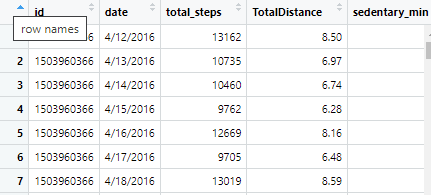

**Transforming Data ** Each dataset was transformed from character
to datetime format. Example below.

daily_activity_3<-daily_activity %>%
  mutate(date= lubridate:: mdy(date))
daily_calories_2<-daily_calories %<%
mutate(ActivityDay = lubridate:: mdy_hms(sleep_day))

Here we want to aggregate the data and place them 
side by side to check for relationship, so the daily activity data 
was joined to the weight data for examination.

In [ ]:
daily_activity_3<- full_join(weight_data, by = "id" "date") 

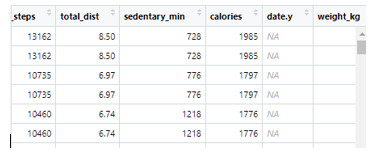

I chose to summarize daily activity dataset because it consisted of all the key performance indicators used to measure fitness. 

In [ ]:
#summarizing  statistics for daily_activity_3
daily_activity_3
summary()
  id               date.x           total_steps   
 Min.   :1.504e+09   Length:2769        Min.   :    0  
 1st Qu.:4.559e+09   Class :character   1st Qu.: 6307  
 Median :6.962e+09   Mode  :character   Median :10433  
 Mean   :6.496e+09                      Mean   :10549  
 3rd Qu.:8.878e+09                      3rd Qu.:13217  
 Max.   :8.878e+09                      Max.   :36019  
        
                                                      
   total_dist     sedentary_min       calories        date.y    
 Min.   : 0.000   Min.   :   0.0   Min.   :   0   Min.   :NA    
 1st Qu.: 4.330   1st Qu.: 689.0   1st Qu.:1946   1st Qu.:NA    
 Median : 7.090   Median : 888.0   Median :2174   Median :NA    
 Mean   : 7.831   Mean   : 917.1   Mean   :2462   Mean   :NA    
 3rd Qu.: 8.980   3rd Qu.:1141.0   3rd Qu.:2905   3rd Qu.:NA    
 Max.   :28.030   Max.   :1440.0   Max.   :4900   Max.   :NA    
                                                  NA's   :2769  
 weight_kg        weight_lb          bmi       
 Min.   : 52.60   Min.   :116.0   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:23.96  
 Median : 62.50   Median :137.8   Median :24.39  
 Mean   : 72.03   Mean   :158.8   Mean   :25.18  
 3rd Qu.: 85.10   3rd Qu.:187.6   3rd Qu.:25.56  
 Max.   :133.50   Max.   :294.3   Max.   :47.54  
 NA's   :693      NA's   :693     NA's   :693  


At this point, some of the variables were paired against each other to find relationships or trends. Starting with sedentary minutes and calories, it was shown that there was an inverse relationship between sedentary time and calories burned. The lowest sedentary time was associated with lowest calories burned and the highest calories burned, the lower sedentary time.  

In [ ]:
# Furthermore, total steps and calories burned were measured. 
The graph below revealed that the number of steps taken were 
associated with greater calorie expenditure. The greatest
concentration of steps taken were around the 2000 calories line,
with the darkest color indicating lower weight measurements associated with 
larger step count greatest calories burned and participants who 
weighed less, took more steps and burned more calories.

In [ ]:
heart_data<-read.csv("heartrate_seconds_merged.csv")
tachy_data<-arrange(heart_data, desc (Value))
tachy_data_2<-tachy_data[c(1, 40, 82, 100, 120, 190, 223, 238, 250, 270,
                           303, 309, 352,360, 381, 400, 402, 411, 455, 478,
                         Id,Value)]

The heartrate data was particularly interesting because heart rate is an important metric used by medical providers to assess heart health.   

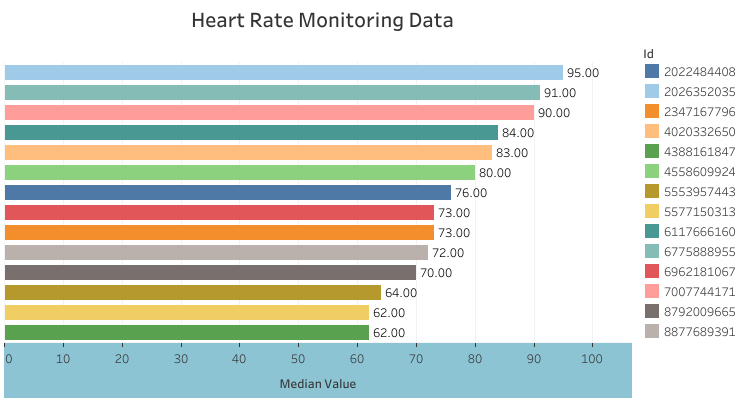


In [ ]:
Trends:
     Looking at the data presented, it was shown that female customers used 
    their smart devices for a variety of purposes to determine key fitness metrics. 
    
    1. Monitoring activity including periods of light,moderate, fairly active
    and very active. This data was documented in time slots during a 24 hour period.
    
    2. Participants were able to compare their inactivity by reviewing the 
    amount of times they were sedentary in minutes and hours. 
    
    3. Other participants used the smart devices to measure their weight by tracking
    and monitoring weight over a period of days and weeks. 
    
    4. Heartrate was monitored as well. This data revealed certain periods when 
    the rate exceeded 100, 120 and 150 which can alert the customer of heartrate 
    above normal limits.     
    
    
    

The qualitative data reviewed suggested that customers used their smart
devices to:
* obtain calendar alerts 
* monitor blood pressure and relaxation levels
* receive and answer SMS messages
* answer phone calls through the smart watch devices
* used for style

Thanks to Anastasia Chebotina whose casestudy on Bellabeat provided the insights and framework for completing my first project.



In [ ]:
Recommendations: 
    
1. Bellabeat's target audience was focused on women,
however there were no data to suggest that the same products could not be
marketed to a wider population including all men.
3. 2. Calendar reminders are a feature of Mykronoz ZeFit smart device.
Reminders such as exercise time, time to measure blood pressure or 
even taking a medication can be programed into the device at the customer's
convenience.
4. 3. Smart watch capabilities could be extended to include SMS features 
and phone answering so that phone calls are not missed during exercise 
periods and can be answered via text or voice mail.
5. That data could be used by medical providers to monitor individuals with abnormal heart rhythms. Using the app, it is possible for the heart rate information to be transmitted electronically to a medical office. This provides a valuable source of information for 
diagnosis and treatment without the individual making a trip to the medical office. 

